## Exercise for KYBS3050

### Mika Lammi 2022

## Description of data and goal of this exercise


### Creating a machine learning algorithm to detect spam emails

My goal is to create a machine learning model which can classify incoming emails as spam or non-spam emails. The practical usage would be to have the algorithm filter out spam emails from user's inbox to the spam folder.

My personal goal is to be able to make model at least 99 % accuracy and precision.


### What data am I using

The data I am using in this exercise is Spambase Data Set from UCI Machine learning repository [(source of the dataset)](https://archive.ics.uci.edu/ml/datasets/Spambase).

It is a collection of email data separated into two categories: spam and non-spam e-mails. The source of spam e-mails come from their postmaster and individuals who had filed those emails as spam. Collection of non-spam e-mails come from filed work and personal e-mails.

The data is useful for constructing personalized spam filters and it isn't really suitable for generating all purpose spam filters for general public. However, I think that his dataset is suitable for my current exercise.







In [47]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [48]:
# Download the data for usage
def getDataset():
    url = "https://www.dropbox.com/s/vwiyk1qeq87xuku/spambase.data.csv?dl=1"
    dataset = pd.read_csv(url).to_numpy()
    headers = pd.read_csv(url, index_col=0, nrows=0).columns.to_numpy()
    cols = dataset.shape[1]
    classifications = dataset[:, cols-1]
    data = dataset[:,0:cols-2]
    feature_names = headers[0:cols-2]
    return data, classifications, feature_names

# classification: 1 = spam, 0 = non-spam
_X, y, feature_names = getDataset()

In [49]:
print("Data shape: ", _X.shape)
print("Number of features: ", len(feature_names))
print("Feature names: ", feature_names)

Data shape:  (4601, 56)
Number of features:  56
Feature names:  ['word_freq_address' 'word_freq_all' 'word_freq_3d' 'word_freq_our'
 'word_freq_over' 'word_freq_remove' 'word_freq_internet'
 'word_freq_order' 'word_freq_mail' 'word_freq_receive' 'word_freq_will'
 'word_freq_people' 'word_freq_report' 'word_freq_addresses'
 'word_freq_free' 'word_freq_business' 'word_freq_email' 'word_freq_you'
 'word_freq_credit' 'word_freq_your' 'word_freq_font' 'word_freq_000'
 'word_freq_money' 'word_freq_hp' 'word_freq_hpl' 'word_freq_george'
 'word_freq_650' 'word_freq_lab' 'word_freq_labs' 'word_freq_telnet'
 'word_freq_857' 'word_freq_data' 'word_freq_415' 'word_freq_85'
 'word_freq_technology' 'word_freq_1999' 'word_freq_parts' 'word_freq_pm'
 'word_freq_direct' 'word_freq_cs' 'word_freq_meeting'
 'word_freq_original' 'word_freq_project' 'word_freq_re' 'word_freq_edu'
 'word_freq_table' 'word_freq_conference' 'char_freq_;' 'char_freq_('
 'char_freq_[' 'char_freq_!' 'char_freq_$' 'char_freq_#'
 

In [50]:
df = pd.DataFrame(_X, 
                  columns = feature_names)
df['is_spam'] = y
df

,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,0.0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,0.0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,0.0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,0.0


In [51]:
def splitData(X, y, random_state=100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state, shuffle=True)
    return X_train, y_train, X_test, y_test

_X_train, y_train, _X_test, y_test = splitData(_X, y)

print("Training data shape: ", _X_train.shape)
print("Test data shape: ", _X_test.shape)
print("Number of samples in the test data: ", len(y_test))
print("Number of samples in the training data: ", len(y_train))

Training data shape:  (3082, 56)
Test data shape:  (1519, 56)
Number of samples in the test data:  1519
Number of samples in the training data:  3082


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA(n_components=0.95) # We want explained variance ratio to be high, at least 95%

X_trained_scaled = pca.fit_transform(scaler.fit_transform(_X_train))
X_test_scaled = pca.transform(scaler.fit_transform(_X_test))

print("PCA new dimensions: ", X_trained_scaled.shape[1])

PCA new dimensions:  47


In [58]:
# Visualize scaled and standardized data
df = pd.DataFrame(X_trained_scaled)
df['is spam'] = y_train
df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,is spam
0,-0.397958,-1.441607,-0.281061,0.545451,-0.475865,0.209311,0.647626,0.190275,0.133678,-0.131635,...,0.344460,0.440006,-0.058072,-0.261270,0.723879,0.132443,-0.339104,0.071323,0.180337,0.0
1,-0.654759,-0.382009,-0.571052,0.497268,0.110462,0.113688,0.151479,0.102991,0.225208,0.573900,...,-0.382874,-0.069001,0.441653,-0.390390,0.428509,0.375775,-0.382583,0.029874,0.152119,1.0
2,-0.584007,0.648725,-0.434491,0.152920,-0.286335,-0.178896,0.694956,-0.419894,0.218113,0.995602,...,0.361499,-0.732232,0.489378,-0.031435,0.360871,-0.592409,0.215470,-0.312711,0.098213,1.0
3,-0.255579,-1.407531,0.903827,-1.417678,-0.521468,0.898780,-1.221546,-0.963913,0.454059,1.031489,...,-0.393274,-0.705595,-0.114090,0.246846,-0.713694,-0.020852,1.031327,0.144583,0.071483,0.0
4,-0.627807,-0.829953,-0.690601,0.220822,-0.760173,0.434789,-0.093204,-0.401044,-0.274198,0.265436,...,0.306768,0.547405,-0.629130,-0.164943,0.119573,-1.062508,0.206685,-0.242133,0.257683,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,-0.643273,-0.535039,-0.397788,0.046589,-0.168229,0.717986,-0.259370,-0.427451,-0.577511,-0.687981,...,0.487896,0.361721,0.519622,-0.316656,-0.104423,0.006225,-0.195216,0.110239,0.245410,0.0
3078,-0.360817,-2.040472,-0.322558,0.631483,0.635768,0.231219,0.933959,0.806152,-0.842452,-0.994756,...,-0.117572,-0.423533,-0.556970,-0.074122,-0.381321,-0.116884,0.426252,0.023888,-0.085208,0.0
3079,-0.482886,0.568012,-0.452058,0.432391,-0.072177,-0.037155,0.084926,0.128865,0.217235,0.337207,...,0.449382,-0.253489,-0.587952,0.279740,0.487987,0.567081,-0.199483,-0.132676,0.139447,1.0
3080,-0.861114,1.221066,-0.762002,-1.073792,-0.919733,0.121434,1.281344,-1.298311,-0.719299,0.536506,...,2.134980,-1.209905,1.531781,-1.630700,0.102622,-2.894739,0.288727,-1.121283,-0.105794,1.0


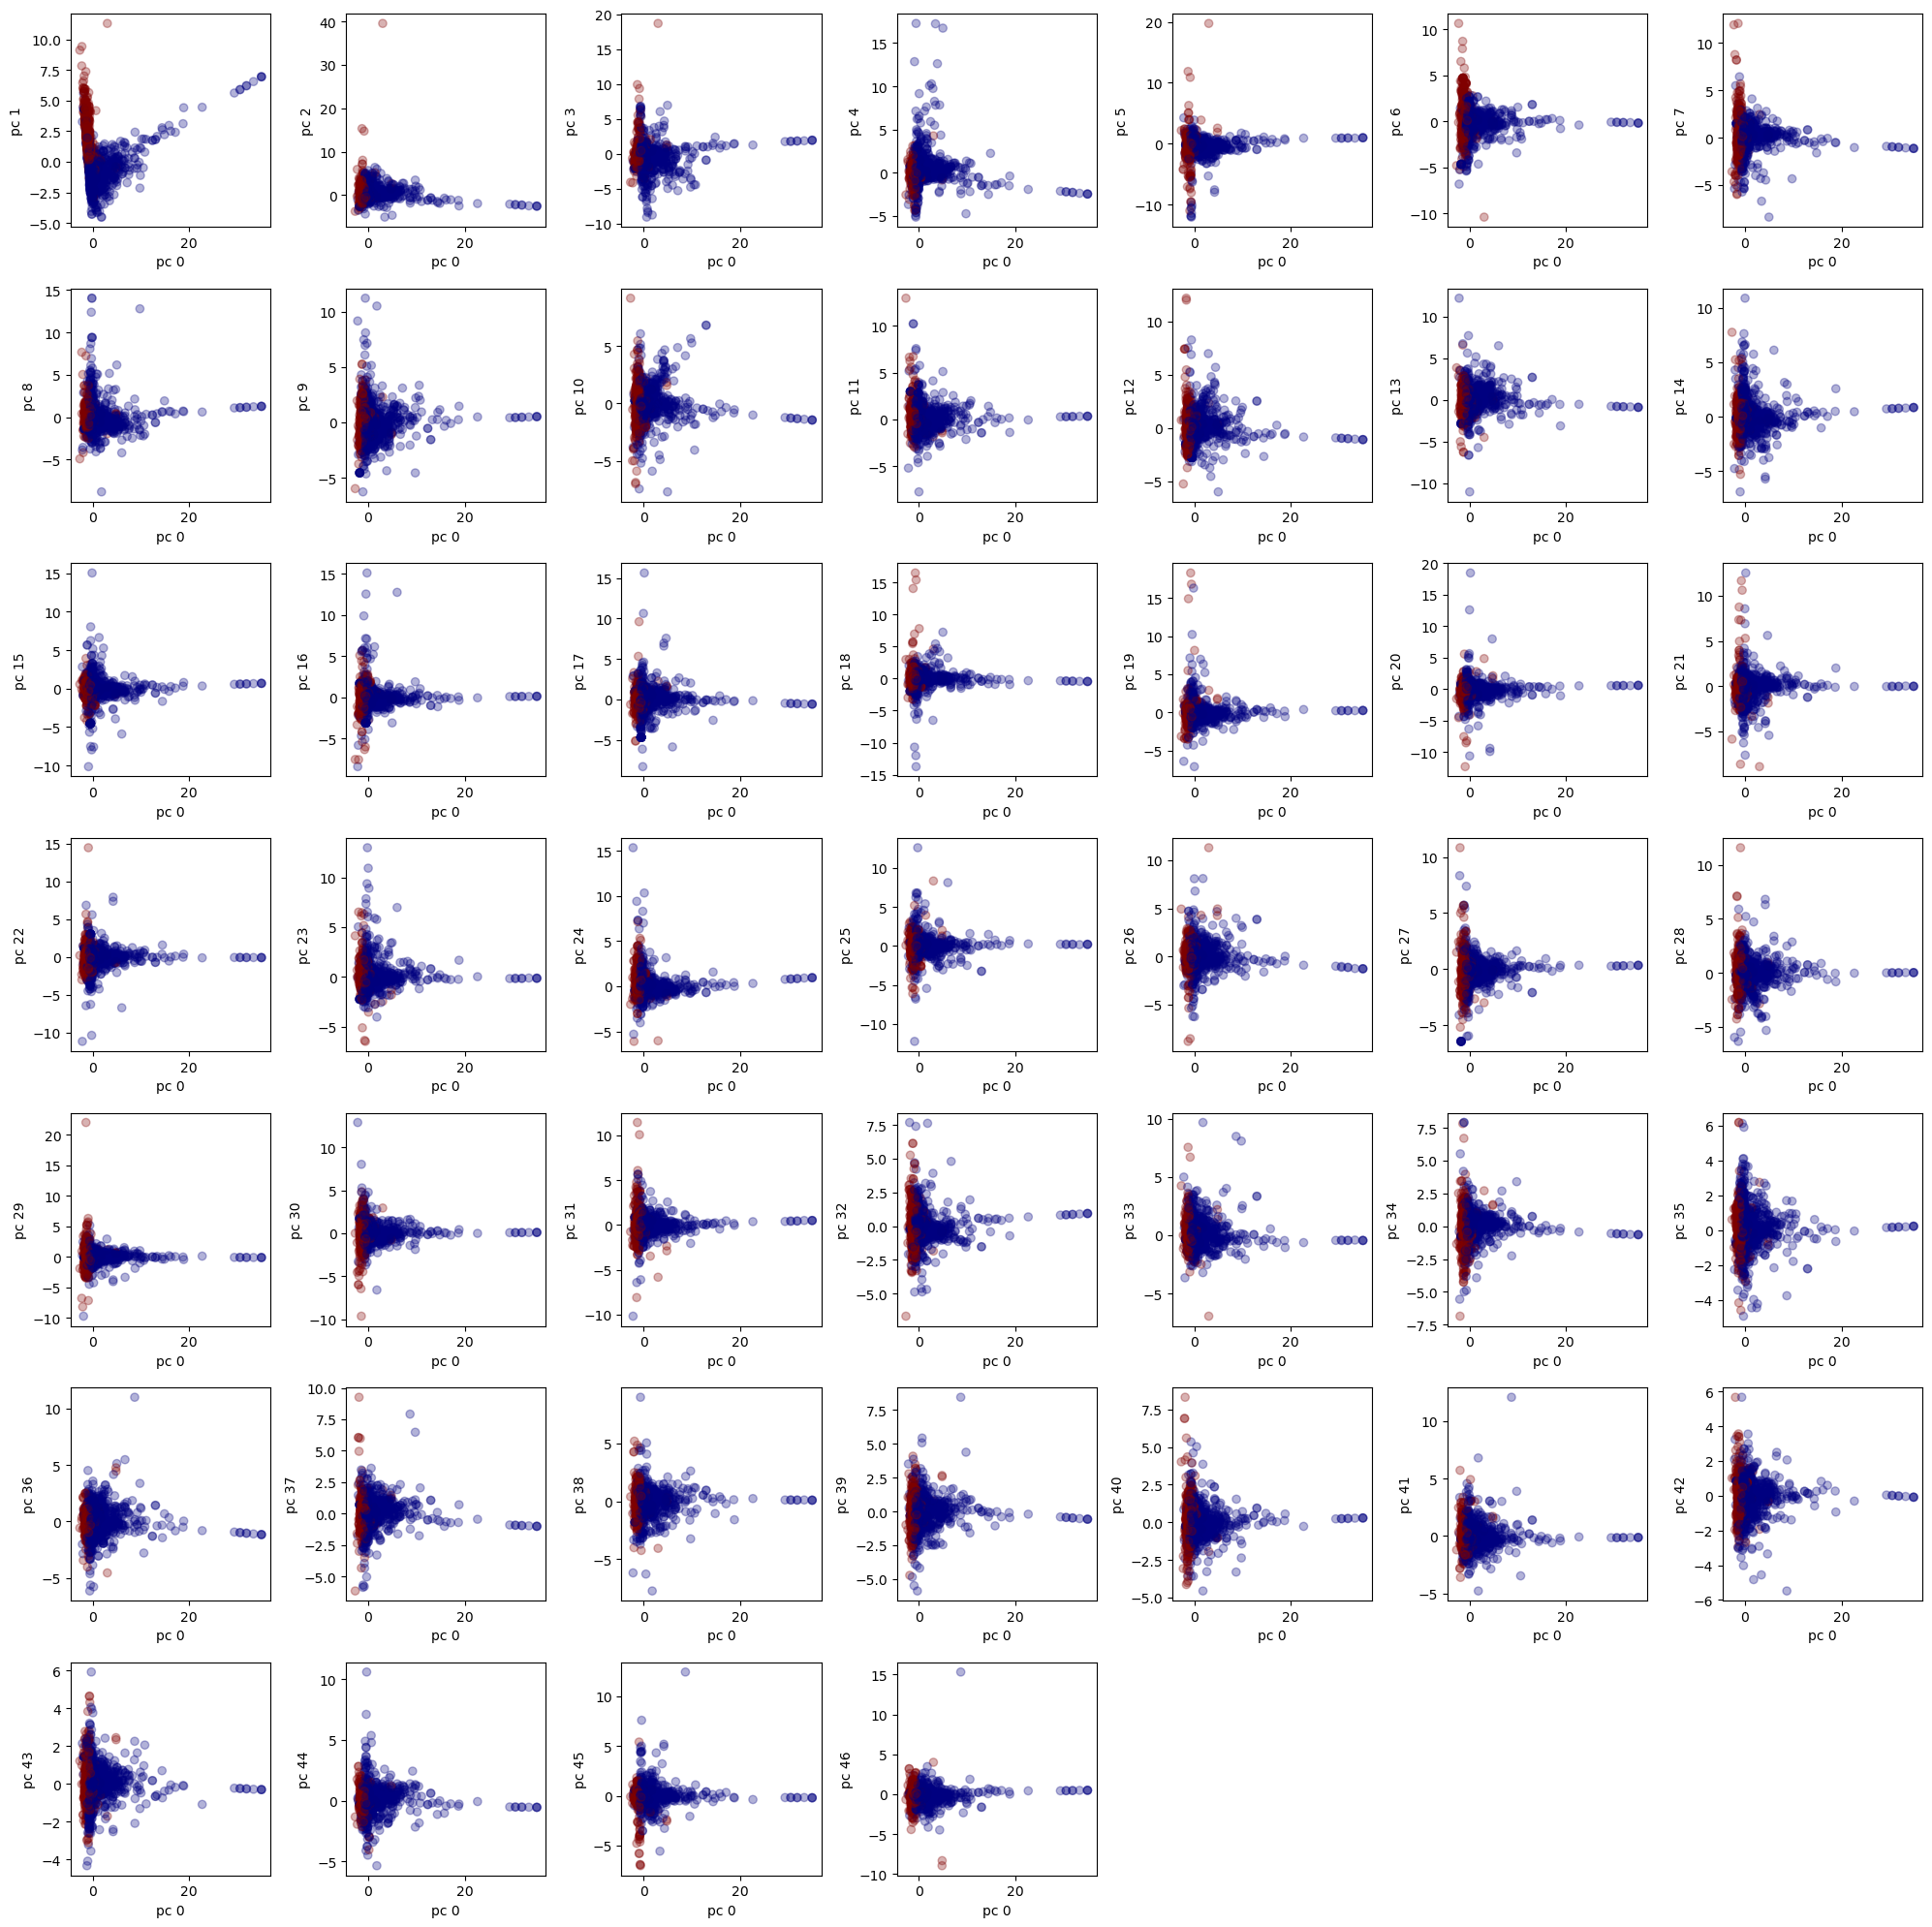

In [59]:
import math

def plot(X_std, y):
    dims = X_std.shape[1]
    temp = math.sqrt(dims)
    dim = math.ceil(temp)
    fig = plt.figure(dpi=100, figsize=(20, 20))
    plt.set_cmap("jet")
    for i in range(1, dims):
            fig.add_subplot(dim, dim, i)
            plt.scatter(X_std[:,0], X_std[:,i], c=y, alpha=0.3)
            plt.xlabel('pc 0')
            ylabel = 'pc ' + str(i)
            plt.ylabel(ylabel)
    fig.tight_layout()
    plt.show()

plot(X_trained_scaled, y_train)


## What metrics to use for model evaluation?

In email spam detection, a false positive would mean that an email that is non-spam has been falsely identified as spam, thus the user might lose important emails if the precision is not high for the spam detection model.

The cost of having mis-classified actual negative (non-spam) is spam email not being filtered out of the inbox. As long as the user is smart enough to not click links or attachments in suspicious emails, the cost of having mis-classified actual negative (non-spam) is pretty minimal. So recall is not as important metric in selecting the best model as precision is.

Because the cost of false positive is high in this case, we choose precision as the metric to find the best model.

In [17]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv2D,MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import tensorflow as tf

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

tf.random.set_seed(100)
print("TensorFlow version:", tf.__version__)

def create_keras_model(activation="relu", neurons=128, dropout=None, optimizer="Adam"):
    model = Sequential()
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(neurons, activation=activation))
    if dropout != None: model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=optimizer,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])
    return model

clf = KerasClassifier(build_fn=create_keras_model, epochs= 50, batch_size=40, verbose= 0)
pipe = Pipeline(steps=[('scaler', scaler), ("pca", pca), ("clf", clf)])

# Grid parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
neurons = [8, 16, 32, 64, 128, 256]
dropout = [None, 0.10, 0.20, 0.30]
optimizer = ['SGD', 'Adam', 'Adamax']
param_grid = dict(
    clf__activation = activation, 
    clf__neurons = neurons, 
    clf__dropout=dropout, 
    clf__optimizer=optimizer)

clf = KerasClassifier(build_fn=create_keras_model, epochs= 50, batch_size=40, verbose= 0)
grid_result = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1, cv=5, error_score="raise", verbose=2, scoring='precision', refit=True)
grid_result.fit(X_trained_scaled, y_train)

print("Max Precision Registred: {} using {}".format(round(grid_result.best_score_,3), 
                                                   grid_result.best_params_))


TensorFlow version: 2.9.1
Fitting 5 folds for each of 360 candidates, totalling 1800 fits


C:\Users\miksu\AppData\Local\Temp\ipykernel_14780\3679656576.py:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=create_keras_model, epochs= 50, batch_size=40, verbose= 0)
C:\Users\miksu\AppData\Local\Temp\ipykernel_14780\3679656576.py:45: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=create_keras_model, epochs= 50, batch_size=40, verbose= 0)


Max Precision Registred: 0.986 using {'clf__activation': 'sigmoid', 'clf__dropout': 0.2, 'clf__neurons': 64, 'clf__optimizer': 'SGD'}


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc

model = RandomForestClassifier(random_state= 101).fit(X_trained_scaled,y_train)
predictionforest = model.predict(X_test_scaled)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc1 = accuracy_score(y_test,predictionforest)

[[872  19]
 [ 85 543]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       891
         1.0       0.97      0.86      0.91       628

    accuracy                           0.93      1519
   macro avg       0.94      0.92      0.93      1519
weighted avg       0.93      0.93      0.93      1519



In [61]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf_rf = RandomForestClassifier()
model_rf = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1, scoring='precision')
model_rf.fit(X_trained_scaled,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, scoring='precision', verbose=5)

In [62]:
predictionforest = model_rf.best_estimator_.predict(X_test_scaled)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

[[874  17]
 [134 494]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       891
         1.0       0.97      0.79      0.87       628

    accuracy                           0.90      1519
   macro avg       0.92      0.88      0.89      1519
weighted avg       0.91      0.90      0.90      1519



In [14]:
# epochs = 100
# model_best_params = create_keras_model(**grid_result.best_params_)
# history = model_best_params.fit(x=X_trained_scaled, y=y_train, epochs=epochs, shuffle=True, validation_data=(X_test_scaled, y_test), verbose=0)


TypeError: create_keras_model() got an unexpected keyword argument 'clf__activation'

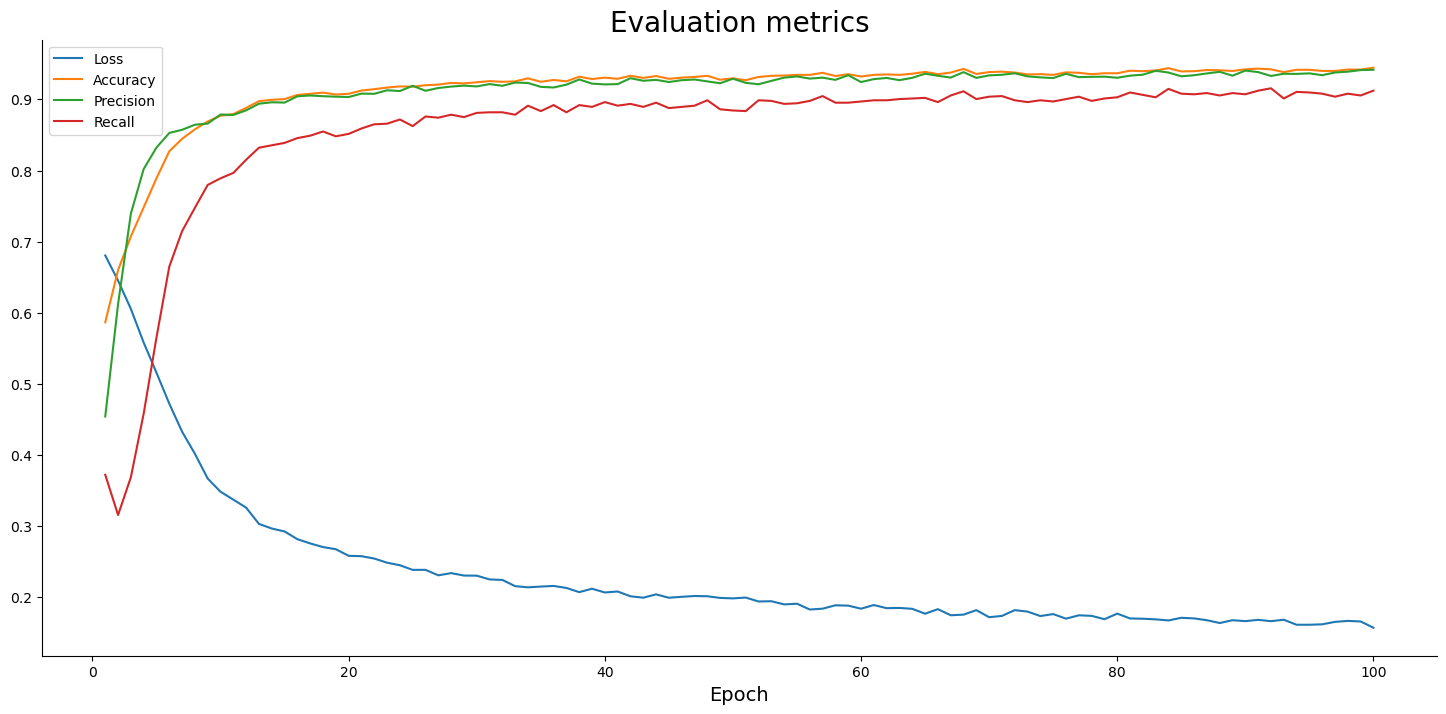

In [65]:
# from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(np.arange(1, epochs+1), history.history['loss'], label='Loss')
plt.plot(np.arange(1, epochs+1), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1, epochs+1), history.history['precision'], label='Precision')
plt.plot(np.arange(1, epochs+1), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()


In [19]:
predictions = grid_result.predict(X_test_scaled).round()

print(confusion_matrix(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print(f"Precision: {precision_score(y_test, predictions):.2f}")
print(f"Recall: {recall_score(y_test, predictions):.2f}")

fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
# print(roc_auc)

plt.figure()
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")


TypeError: float() argument must be a string or a number, not 'PCA'